# Python Graded Assignment

**Group Member 1:** Anugya Shaw (D19006)
<br>
**Group Member 2:** Aiswarya Alapuzha (D19002)   

## Introduction

Graph is a custom function which is created to plot **univariate analysis** from a given dataset on the **basis** of the **data type** of the variables(categorical and numerical).It contains 3 arguments [df(mandatory) to call the dataframe, l (optional, default = all columns) list of columns to plot, directory(optional,default = current directory) file path where plots are to be saved].
<br>
It aims to plot **histogram and boxplot** for *numerical* variables and **barplot** for *categorical* variables.It also **saves** the plots in the default or given directory.

### Original Graph Function

In [8]:
def graph(df, columns = None, directory = None):

    import numpy as np   #importing the necessary libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    sns.set() 
    
    if directory is None:
           directory=os.getcwd() #current working directory is stored
        
    if columns is None:
        columns = list(df.columns)
    #separating the categorical and numerical data
    
    categorical=[]
    numerical=[]    
        
    for i in columns:
        if (np.dtype(df[i])=='object'or len(np.unique(df[i]))<15):
            categorical.append(i)
        else :
            numerical.append(i)
    print('Categorical columns are',categorical)
    print('Numerical columns are',numerical)
        
    for i in categorical:
        #plotting bar graph
        df[i].value_counts().plot(kind='barh',color='green',fontsize=15)
        plt.xlabel('Number of Elements',fontsize=15)
        plt.ylabel(i,fontsize=15)
        plt.title('Bargraph of '+i,fontsize=15)
        plt.savefig(directory+"/Bargraph of "+i+".png")
        plt.show()
        
    for i in numerical:
        #plotting histogram
        df.hist(column=i,grid= False, figsize=(6,4))
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Number of elements',fontsize=12)
        plt.title('Histogram of '+i.upper(),fontsize=15)
        plt.savefig(directory+"/Histogram of "+i+".png")
        plt.show()

        #plotting boxplot
        df.boxplot(column=i,fontsize=15)
        plt.ylabel('Number of elements',fontsize=12)
        plt.title('Boxplot of '+i.upper(),fontsize=15)
        plt.savefig(directory+"\\Boxplot of "+i+".png")
        plt.show()
            
        
        


In [9]:
import pandas as pd
#reading the csv file
cars=pd.read_csv('C:\\Users\\Anugya\\Desktop\\Term 1\\ML1\\cars.csv')
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


Categorical columns are ['Origin']
Numerical columns are ['MPG', 'Acceleration']


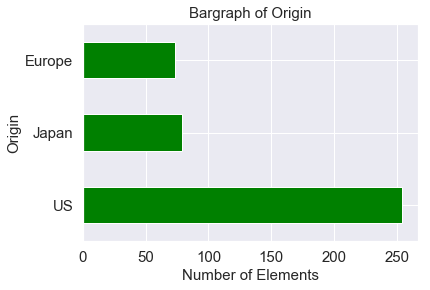

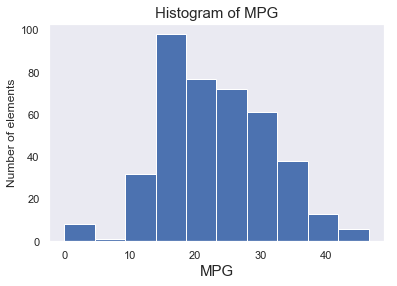

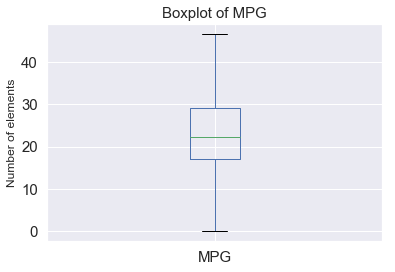

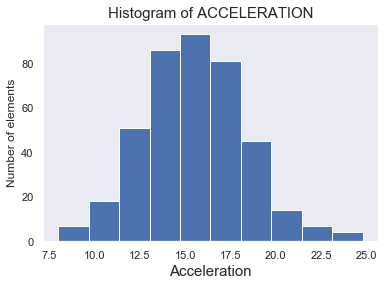

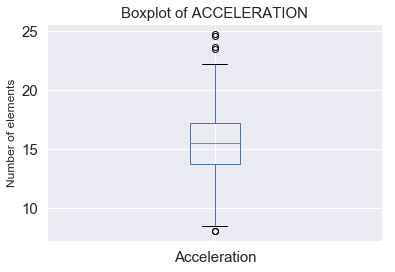

In [10]:
graph(cars,columns=['MPG','Acceleration','Origin'])

## Using windows GUI to import file

Creating a windows GUI to import csv file as per the choice of user, using Tkinter.

In [13]:
#importing necessary libraries
import tkinter as tk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tkinter import filedialog

root= tk.Tk()


canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def getCSV ():
    global df
    
    import_file_path = filedialog.askopenfilename()
    df = pd.read_csv (import_file_path)
    print (df)
    
browseButton_CSV = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=browseButton_CSV)

root.mainloop()

      Age  Attrition     BusinessTravel              Department  \
0      41          1      Travel_Rarely                   Sales   
1      49          0  Travel_Frequently  Research & Development   
2      37          1      Travel_Rarely  Research & Development   
3      33          0  Travel_Frequently  Research & Development   
4      27          0      Travel_Rarely  Research & Development   
5      32          0  Travel_Frequently  Research & Development   
6      59          0      Travel_Rarely  Research & Development   
7      30          0      Travel_Rarely  Research & Development   
8      38          0  Travel_Frequently  Research & Development   
9      36          0      Travel_Rarely  Research & Development   
10     35          0      Travel_Rarely  Research & Development   
11     29          0      Travel_Rarely  Research & Development   
12     31          0      Travel_Rarely  Research & Development   
13     34          0      Travel_Rarely  Research & Developmen

Windows dialog box will open for the user to select the input file which will be stored in df (pandas dataframe)


Categorical columns are ['JobLevel']
Numerical columns are ['Age', 'MonthlyIncome']


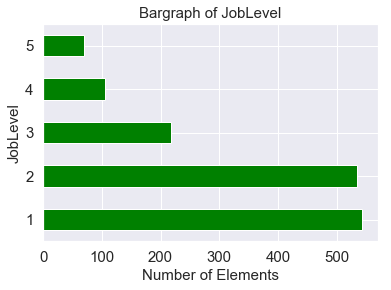

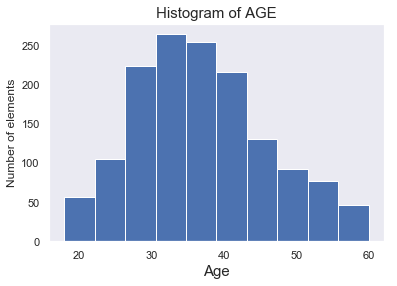

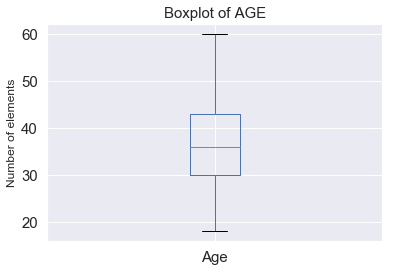

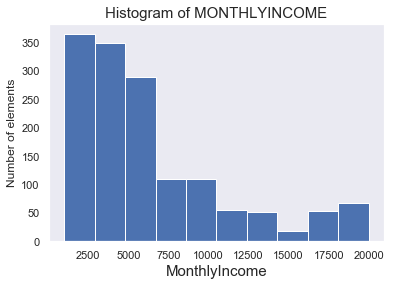

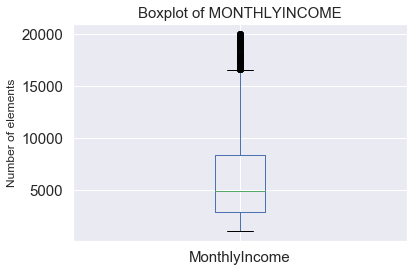

In [5]:
#using the original graph function to plot the respective graphs
graph(df,columns=['Age','MonthlyIncome','JobLevel'])

## First Improvisation

User can plot the type of graph based on their choice using the extra argument **graph_type**. The value in graph_type can be *Hist, Box, Barh* and *All*.The plot will be created as per the value of graph_type and **variable type**. Here graph_type is a mandatory argument.


In [14]:
def graph(df, columns = None, directory = None, graph_type = None):

    import numpy as np   #importing the necessary libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    sns.set() 
    
    if directory is None:
           directory=os.getcwd() #current working directory is stored
        
    if columns is None:
        columns = list(df.columns)
   
    #taking empty list for categorical and numerical types
    categorical=[]
    numerical=[]   
    
    #if value of graph_type is hist
    if graph_type == 'Hist':
        
        #check for numerical variable
        for i in columns:
            if((np.dtype(df[i])=='float') or (np.dtype(df[i])=='int')):
                numerical.append(i)
            else:
                print('{} is not numerical,so Histogram cannot be plotted.'.format(i))
                
        #if list is not empty,then print the column   
        if numerical != []:
            print('Numerical columns are',numerical)
    
        for i in numerical:
            #plotting histogram
            df.hist(column=i,grid= False, figsize=(6,4))
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Number of elements',fontsize=12)
            plt.title('Histogram of '+i.upper(),fontsize=15)
            plt.savefig(directory+"/Histogram of "+i+".png")
            plt.show()
        
    
    #if value of graph_type is box
    elif graph_type == 'Box':
        
        #check for numerical variable
        for i in columns:
            if((np.dtype(df[i])=='float') or (np.dtype(df[i])=='int')):
                numerical.append(i)
            else:
                print('{} is not numerical,so Boxplot cannot be plotted.'.format(i))    
        #if list is not empty         
        if numerical != []:
            print('Numerical columns are',numerical)
       
    
        for i in numerical:
            #plotting boxplot
            df.boxplot(column=i,fontsize=15)
            plt.ylabel('Number of elements',fontsize=12)
            plt.title('Boxplot of '+i.upper(),fontsize=15)
            plt.savefig(directory+"\\Boxplot of "+i+".png")
            plt.show()
                
                
    #if value of graph_type is box            
    elif graph_type == 'Barh':
       
        #check for categorical variable
        for i in columns:
            if (np.dtype(df[i])=='object'or len(np.unique(df[i]))<15):
                categorical.append(i)
            else:
                print('{} is not categorical,so Bargraph cannot be plotted.'.format(i))   
        #if list is not empty         
        if categorical != []:
            print('Categorical columns are',categorical)
    
        for i in categorical:
            #plotting of bar graph
            df[i].value_counts().plot(kind='barh',color='green',fontsize=15)
            plt.xlabel('Number of Elements',fontsize=15)
            plt.ylabel(i,fontsize=15)
            plt.title('Bargraph of '+i,fontsize=15)
            plt.savefig(directory+"/Bargraph of "+i+".png")
            plt.show()
            
    elif graph_type == 'All':
        for i in columns:
            if (np.dtype(df[i])=='object'or len(np.unique(df[i]))<15):
                categorical.append(i)
            else :
                numerical.append(i)
        print('Categorical columns are',categorical)
        print('Numerical columns are',numerical)
        
        for i in categorical:
            df[i].value_counts().plot(kind='barh',color='green',fontsize=15)
            plt.xlabel('Number of Elements',fontsize=15)
            plt.ylabel(i,fontsize=15)
            plt.title('Bargraph of '+i,fontsize=15)
            plt.savefig(directory+"/Bargraph of "+i+".png")
            plt.show()

        for i in numerical:
            #plotting histogram
            df.hist(column=i,grid= False, figsize=(6,4))
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Number of elements',fontsize=12)
            plt.title('Histogram of '+i.upper(),fontsize=15)
            plt.savefig(directory+"/Histogram of "+i+".png")
            plt.show()

            #plotting boxplot
            df.boxplot(column=i,fontsize=15)
            plt.ylabel('Number of elements',fontsize=12)
            plt.title('Boxplot of '+i.upper(),fontsize=15)
            plt.savefig(directory+"\\Boxplot of "+i+".png")
            plt.show()

            

Origin is not numerical,so Histogram cannot be plotted.
Numerical columns are ['MPG', 'Acceleration']


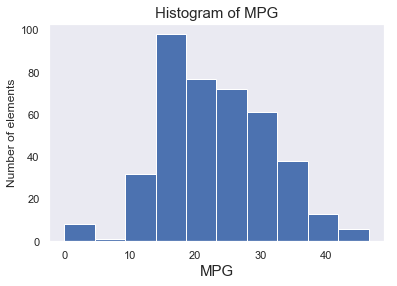

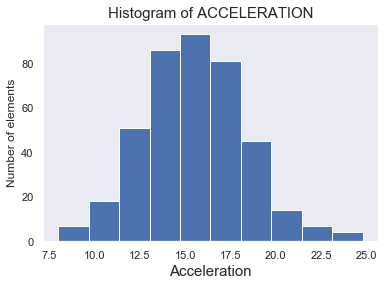

In [15]:
graph(cars, columns = ['MPG','Origin','Acceleration'],graph_type = 'Hist')

Origin is not numerical,so Boxplot cannot be plotted.
Numerical columns are ['MPG', 'Acceleration']


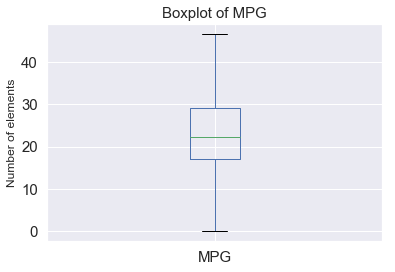

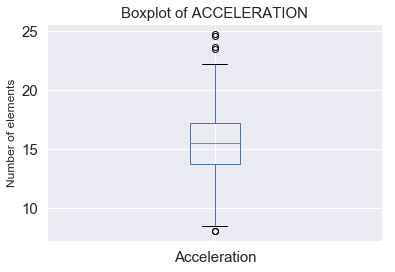

In [78]:
graph(cars, columns = ['MPG','Origin','Acceleration'],graph_type = 'Box')

MPG is not categorical,so Bargraph cannot be plotted.
Acceleration is not categorical,so Bargraph cannot be plotted.
Categorical columns are ['Origin']


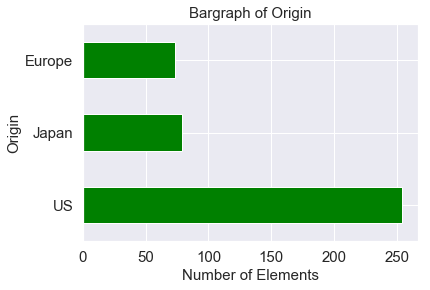

In [79]:
graph(cars, columns = ['MPG','Origin','Acceleration'],graph_type = 'Barh')

## Second Improvisation

Creating a module to hold the graph function, so we can import the function when required.
We have put the graph function inside python file trial.py and then using it by importing the same.

In [2]:
from trial import *

In [3]:
import pandas as pd
#reading the csv file
cars=pd.read_csv('C:\\Users\\Aiswarya\\Desktop\\python\\missed classes\\cars.csv')


MPG is not categorical,so Bargraph cannot be plotted.
Acceleration is not categorical,so Bargraph cannot be plotted.
Categorical columns are ['Origin']


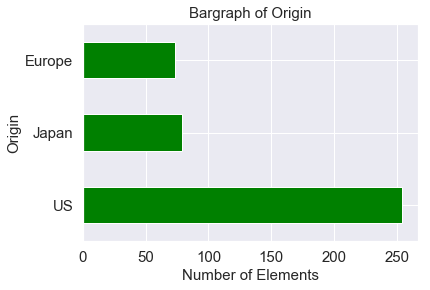

In [5]:
graph(cars, columns = ['MPG','Origin','Acceleration'],graph_type = 'Barh')